# Week 6: Introducing the Poisson process

After studying Discrete Time Markov Chains, we start a new chapter on the Poisson process, which relies on the Exponential Distribution. We reviewed some important properties of this distribution, which will be very useful to characterise the Poisson process.

To sample from the exponential distribution, we can use the Numpy random library (be careful with the scale parameter!): https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

In [1]:
import numpy as np

mu= 1/3 #ADD PARAMETER HERE
n= 100 #ADD sample size here
x= np.random.exponential(mu,n) #ADD to sample n times from Exp(1/mu)

#Uncomment below if you want to display x
#print(x)
print(np.mean(x)) #check that the average is approximately mu when n is large enough

0.3155849320220735


By sampling from the exponential distribution, let's verify that the minimum of two independent exponential r.v.'s is still exponential.

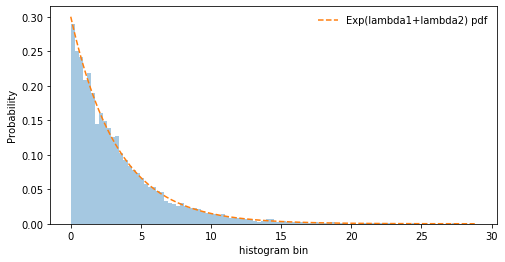

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

lambda1= 0.1 #ADD PARAMETER HERE
lambda2= 0.2 #ADD PARAMETER HERE

# Define a function to sample X = min(X1, X2) where X1 ~ Exp(lambda1), X2 ~ Exp(lambda2) are independent
def sample_min_X1_X2(lambda1, lambda2, n):
    X1 = np.random.exponential(1/lambda1, n)
    X2 = np.random.exponential(1/lambda2, n)
    return np.minimum(X1, X2)


# Compute the empirical histogram and compare with the pdf of Exp(lambda1+lambda2)
n = 10000   # Number of samples
X_array = sample_min_X1_X2(lambda1, lambda2, n)   # Draw n samples from the distribution

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

# Compute the histogram
xi, bins, pr = ax.hist(X_array, 100, density=True, alpha=0.4)

# Definite the theoretical pdf
def pdf(x):
    return (lambda1 + lambda2)*np.exp(-(lambda1+lambda2)*x)

# Plot the theoretical pdf
x_axis = np.arange(0, bins[-1], 0.2)
ax.plot(x_axis, [pdf(x) for x in x_axis], '--', label='Exp(lambda1+lambda2) pdf')
ax.legend(loc='best', frameon=False)
plt.show()

## Poisson process: A first example

To introduce the Poisson process, we consider the following example. Suppose that your TA starts grading a pile of homework problems at time $t=0$, one after the other. We assume that the time it takes to grade one copy follows an Exponential distribution of parameter $\lambda$. Let's consider the random sequence of times $(T_i)_{1\leq i \leq n}$ of times when the $i$-th copy is graded. By sampling from the exponential distribution, generate a sample of the sequence of times showing when each copy is graded and represent it on a time axis.

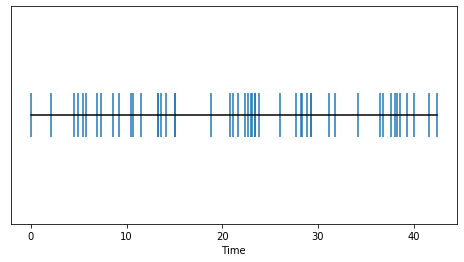

In [12]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Lambda = 1 #ADD PARAMETER HERE
N = 50 #ADD PARAMETER HERE

# Define a function which samples N times according to Exp(Lambda)
def sample_times(Lambda, N):
    return np.random.exponential(1/Lambda, N)


# Sample the times for grading each exam
Ti = sample_times(Lambda, N)

#Uncomment below if you want to display Ti
#print(Ti)

# Calculate the time sequence
Timeseq = np.cumsum(Ti)

# Plot on a time axis
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("Time")
ax.set_ylim([0.75,1.25])
ax.plot([0,Timeseq[-1]], [1,1], color='k' )
plt.yticks([])
ax.eventplot(Timeseq, linelengths=0.1)
plt.show()

Suppose your TA has to grade 50 copies, and let $T$ be the time they spend on it. We assume it takes the time to grade one copy is exponential  5 min in average. Using results from class, can you tell what law $T$ should follow? Compare this theoretical result with simulations

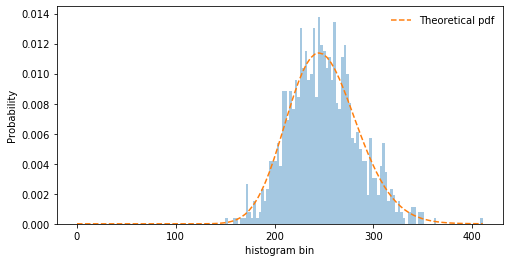

In [13]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

N = 50   # Number of copies
Lambda = 1/5 #ADD PARAMETER HERE

# Define a function which samples T by sampling grading times for each paper and summing them
def sample_total_time(Lambda, N):
    times = sample_times(Lambda, N) #We use the exponential sampling defined in previous block
    return np.sum(times)

# Sample T a number of times
m = 1000
T_array = np.zeros(m)
for i in range(m):
    T_array[i] = sample_total_time(Lambda, N)

# Plot the empirical histogram and the theoretical pdf for T to compare
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

# Compute and plot the histogram
ti, bins, pr = ax.hist(T_array, 100, density=True, alpha=0.4)

# Specify the theoretical pdf
x = np.linspace(0, bins[-1], num=100)
f= Lambda*np.exp(-Lambda*x)*((Lambda*x)**(N-1))/math.factorial(N-1) #ENTER THE THEORETICAL PDF f(x) HERE 

# Plot the theoretical pdf
ax.plot(x, f, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

Let's go further and consider $N(t)$ the number of copies graded at time $t$. Use the previous code to plot to simulate the grading process and plot $N(t)$

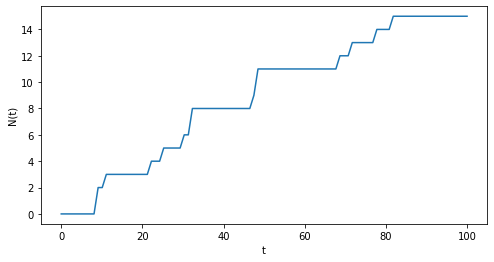

In [19]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

Lambda = 1/5 #ADD PARAMETER HERE
tmax= 100 # ADD PARAMETER HERE (maximum time of observation)

def num_copies_graded(tmax, Lambda):
    t_array = np.linspace(0, tmax, num=100)
    count=np.zeros(100)
    event=0
    while event < t_array[-1]:
        Ti = sample_times(Lambda, 1) #We use the exponential sampling defined in previous block
        event += Ti
        count[t_array >= event] +=1
    return count


# Plot N(t)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("N(t)")

t_array = np.linspace(0, tmax, num=100)
ax.plot(t_array, num_copies_graded(tmax, Lambda))
plt.show()

By simulating the process multiple times, we can also extract a histogram of N(t)

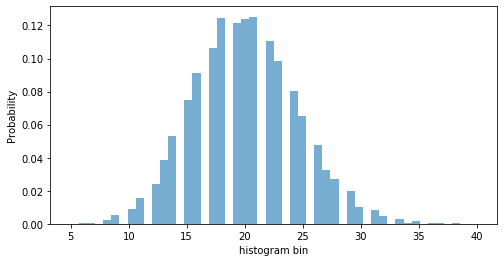

In [21]:
t = 100 #ADD PARAMETER HERE
Lambda = 1/5 #ADD PARAMETER HERE

# Sample N(t) a number of times
m = 10000
Nt_array = np.zeros(m)
for i in range(m):
    N=num_copies_graded(t, Lambda)
    Nt_array[i] = N[-1]

# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

plt.hist(Nt_array, 50, density=True, alpha=0.6)
plt.show()

Intuitively, given that it takes in average $\frac{1}{\lambda}$ to grade a copy, what should be $\mathbb{E}(N(t))$ as a function of $t$ and $\lambda$? We'll see in class that $N(t)$ actually follows a **Poisson distribution**.